In [1]:
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Trabajo Practico Final
En este trabajo practico vamos a analizar los datos de una agencia de publicidad con influencers via distintas plataformas (Instagram, Facebook, Twitter, etc).

El primero DF que vamos a analizar es el que contiene data demografia de los distintos perfiles con sus followers y alguna data adicional. El segundo DF contiene informacion individual de los diversos contenidos publicados por los creadores de contenidos

El objetivo de este trabajo es analizar si las bases de datos de la agencia ZZZ estan correctamente cargadas y en caso de que no detectar a que departamento debemos pedirle que mejore su performance. Por otro lado, con un analisis exploratio podriamos obtener insights que nos ayuden a la implementacion de diversas campañas de marketing generando que el negocio mejore tanto en reputacion como en rentabilidad
Por ultimo, buscaremos una relacion entre las diversas metricas para ver si podemos utilizar el conocimiento que tienen nuestros datos para futuras campañas o mismo hacer benchmarking

# DF Influencer Data

Los datos de este DF los podemos obtener de 2 maneras:
1. Los creadores de contenido nos comparten las fotos de sus metricas
2. En caso de que no las compartan, se estiman segun perfiles similares que las plataformas nos indican por compartir similitud demografica
Esta informacion se ve en la columna de "tenemos datos?". En el caso de "Parcial" se debe a que mando sus metricas reales pero algunas siguen faltando

In [2]:
path_file1 = "data/TEMPLATE ARGENTINA - Con modificacion Talent (1)-2.xlsx"

In [3]:
data_influencers = pd.read_excel(path_file1)

In [4]:
data_influencers.head()

,Account,Link,Tenemos datos?,Fecha ultima actualización data,similar a,Followers,1ra Categoría,2da Categoría,3ra Categoría,ER,...,F 35-44,F 45-54,F 55-64,"F ""+65""",Argentina,Other,CPM historico,Tiene Fee Plataforma?,REPRESENTANTE,Nombre Perfil
0,alfonsobenja,https://www.instagram.com/alfonsobenja,Si,2021-03-27,NaN,389358.0,Actor/Actress,NaN,NaN,0.0532,...,0.130,0.03,0.001,-0.001,0.880,0.120,0.0,no,si,si
1,lucianocaceresok,https://www.instagram.com/lucianocaceresok,No,2021-06-17,ludovicods,153011.0,Actor/Actress,NaN,NaN,0.0100,...,0.130,0.03,0.001,-0.001,0.930,0.070,NaN,NaN,NaN,NaN
2,ludovicods,https://www.instagram.com/ludovicods,Parcial,2018-10-23,alfonsobenja,342601.0,Actor/Actress,model,NaN,0.0560,...,0.130,0.03,0.001,-0.001,0.930,0.070,0.0,NaN,NaN,NaN
3,ailinzeta,https://www.instagram.com/ailinzeta,No,2019-02-28,florjazminpe,20200.0,Actor/Actress,NaN,NaN,0.0950,...,0.148,0.05,0.010,0.000,0.816,0.184,NaN,NaN,NaN,NaN
4,basnicar,https://www.instagram.com/basnicar,No,2019-09-19,stefroitman,858457.0,Actor/Actress,Model,NaN,0.0490,...,0.090,0.03,0.010,0.010,0.650,0.350,0.0,NaN,NaN,NaN


Las columnas disponibles en esta tabla son:

In [5]:
data_influencers.columns

Index(['Account', 'Link', 'Tenemos datos?', 'Fecha ultima actualización data ',
       'similar a ', 'Followers', '1ra Categoría', '2da Categoría',
       '3ra Categoría', 'ER', '% Male', '% Female', 'M 13-17', 'M 18-24',
       'M 25-34', 'M 35-44', 'M 45-54', 'M 55-64', 'M "+65"', 'F 13-17',
       'F 18-24', 'F 25-34', 'F 35-44', 'F 45-54', 'F 55-64', 'F "+65"',
       'Argentina', 'Other', 'CPM historico', 'Tiene Fee Plataforma?',
       'REPRESENTANTE', 'Nombre Perfil'],
      dtype='object')

Esta tabla tiene diversas columnas. Lo siguiente que haremos es describir cada columna individualmente
- Account: nombre del perfil (tal como aparece en la plataforma)
- Link: es el URL para ir al perfil del creador de contenido
- Tenemos datos?: determina si los datos fueron enviados o no
- Fecha ultima actualización data: Este campo se actualiza solo con las modificaciones de metricas demograficas. NO con followers o ER
- Similar a: describe si ese perfil es similar a otra creador de contenido
- Followers: tamaño de su audiencia
- 1era categoria: Es la principal categoria del tipo de contenido que ese perfil genera
- 2da categoria: Es la segunda categoria de los contenidos.
- 3er categoria: Es la tercer categoria de los contenidos
(Es importante mencionar que no todos los perfiles cuentan con 2da o 3er categoria)
- ER: Es el Engagment Rate del perfil a la ultima actualizacion. (a modo informativo, el ER es como es la interaccion de la audiencia con los contenidos)
- %Male, %Female, M 13-17, M18-24 a F+65, describe el % que tiene ese perfil en los diversos segmentos. En este caso es importante mencionar que todo lo que comienze con M debe sumar 100% y todo F tambien. Lo mismo sucede con el %Male + %Female = 100%
- Argentina & Other: es el % de audiencia ubicada en Argentina y other es el complemento
- Las demas columnas son una prueba de los ultimos meses, por lo cual no es pertinente el analisis porque aun no estan completas


Las columnas de CPM Historico, tiene fee plataforma, representante y nombre perfil las vamos a eliminar porque estan en proceso de armado y van encontrarse muchos nulos.

Ahora vamos a analizar cuantas filas y columnas tenemos en nuestra base junto a su tipo de dato

In [6]:
data_influencers = data_influencers.drop(['CPM historico','Tiene Fee Plataforma?','REPRESENTANTE','Nombre Perfil'], axis=1)

In [7]:
print(f" El dataframe es un excel con data de los influencers argentinos por plataforma. En el dataset hay {data_influencers.shape[0]} filas y {data_influencers.shape[1]}. Los tipos de datos por columnas son {data_influencers.dtypes}")

 El dataframe es un excel con data de los influencers argentinos por plataforma. En el dataset hay 3505 filas y 28. Los tipos de datos por columnas son Account                                     object
Link                                        object
Tenemos datos?                              object
Fecha ultima actualización data     datetime64[ns]
similar a                                   object
Followers                                  float64
1ra Categoría                               object
2da Categoría                               object
3ra Categoría                               object
ER                                         float64
% Male                                     float64
% Female                                   float64
M 13-17                                    float64
M 18-24                                    float64
M 25-34                                    float64
M 35-44                                    float64
M 45-54                         

Otra forma de ver lo mismo:

In [8]:
data_influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3505 entries, 0 to 3504
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Account                           3505 non-null   object        
 1   Link                              3494 non-null   object        
 2   Tenemos datos?                    3505 non-null   object        
 3   Fecha ultima actualización data   3505 non-null   datetime64[ns]
 4   similar a                         2704 non-null   object        
 5   Followers                         3504 non-null   float64       
 6   1ra Categoría                     3505 non-null   object        
 7   2da Categoría                     738 non-null    object        
 8   3ra Categoría                     124 non-null    object        
 9   ER                                3505 non-null   float64       
 10  % Male                            3505 non-null 

Vamos a analizar si contamos con datos duplicados

In [9]:
cantidad_duplicados = len(data_influencers) - len(data_influencers.drop_duplicates())
cantidad_duplicados

0

Y para ver si contamos con celdas vacias/faltantes vamos a usar el siguiente codigo

In [10]:
data_influencers.isna().sum()

Account                                0
Link                                  11
Tenemos datos?                         0
Fecha ultima actualización data        0
similar a                            801
Followers                              1
1ra Categoría                          0
2da Categoría                       2767
3ra Categoría                       3381
ER                                     0
% Male                                 0
% Female                               0
M 13-17                              166
M 18-24                              163
M 25-34                              162
M 35-44                              164
M 45-54                              174
M 55-64                              178
M "+65"                              165
F 13-17                              172
F 18-24                              165
F 25-34                              165
F 35-44                              165
F 45-54                              174
F 55-64         

Porcentaje de faltantas

In [11]:
data_influencers.isna().sum()/len(data_influencers)

Account                             0.000000
Link                                0.003138
Tenemos datos?                      0.000000
Fecha ultima actualización data     0.000000
similar a                           0.228531
Followers                           0.000285
1ra Categoría                       0.000000
2da Categoría                       0.789444
3ra Categoría                       0.964622
ER                                  0.000000
% Male                              0.000000
% Female                            0.000000
M 13-17                             0.047361
M 18-24                             0.046505
M 25-34                             0.046220
M 35-44                             0.046790
M 45-54                             0.049643
M 55-64                             0.050785
M "+65"                             0.047076
F 13-17                             0.049073
F 18-24                             0.047076
F 25-34                             0.047076
F 35-44   

En razonable que algunas columnas den nulos, como por ejemplo 2da categoría y 3er categoría porque no todos los creadores de contenido tienen mas de una categoria. Estas columnas se utilizar para los creadores de contenido que tienen distintos tipos de contenido.
Por otro lado las columnas de Argentina, Other, ER, Followers y % Male/Female no pueden tener nulos porque todos los perfiles en todas las plataformas tienen estos datos disponibles.
Por ultimo, el rango etario puede contener nulos porque ciertas plataformas como TikTok no cuenta con esa informacion.

En el caso de nulo de followers lo vamos a analizar para eliminar porque no nos sirve el registro para nuestro analisis

In [12]:
data_influencers[data_influencers.Followers.isna()]

,Account,Link,Tenemos datos?,Fecha ultima actualización data,similar a,Followers,1ra Categoría,2da Categoría,3ra Categoría,ER,...,"M ""+65""",F 13-17,F 18-24,F 25-34,F 35-44,F 45-54,F 55-64,"F ""+65""",Argentina,Other
3495,serevaliconto,https://www.instagram.com/serevaliconto,Si,2018-04-01,NaN,NaN,Instagrammer,NaN,NaN,0.066,...,0.05,0.01,0.45,0.38,0.09,0.04,0.0,0.03,0.89,0.11


Al ser un perfil actualizado hace tanto tiempo podemos descartarlo porque seguramente existio un error al cargarlo

In [13]:
data_influencers = data_influencers[data_influencers['Followers'].notna()]

Para corroborar que el registro ha sido eliminado correctamente ejecutaremos el codigo nuevamente

In [14]:
data_influencers.isna().sum()

Account                                0
Link                                  11
Tenemos datos?                         0
Fecha ultima actualización data        0
similar a                            800
Followers                              0
1ra Categoría                          0
2da Categoría                       2766
3ra Categoría                       3380
ER                                     0
% Male                                 0
% Female                               0
M 13-17                              166
M 18-24                              163
M 25-34                              162
M 35-44                              164
M 45-54                              174
M 55-64                              178
M "+65"                              165
F 13-17                              172
F 18-24                              165
F 25-34                              165
F 35-44                              165
F 45-54                              174
F 55-64         

Ahora lo que haremos en analizar algunos indicadores estadisticos para entender como se ponen las diversas categorias

In [15]:
data_influencers.describe(include = [np.number])

,Followers,ER,% Male,% Female,M 13-17,M 18-24,M 25-34,M 35-44,M 45-54,M 55-64,"M ""+65""",F 13-17,F 18-24,F 25-34,F 35-44,F 45-54,F 55-64,"F ""+65""",Argentina,Other
count,3.504000e+03,3504.000000,3504.000000,3504.000000,3338.000000,3341.000000,3342.000000,3340.000000,3330.000000,3326.000000,3339.000000,3332.000000,3339.000000,3339.000000,3339.000000,3330.000000,3330.000000,3331.000000,3504.000000,3504.000000
mean,3.701081e+05,0.044798,0.272837,0.727265,0.028755,0.243576,0.401583,0.211411,0.075680,0.021723,0.022857,0.033054,0.263365,0.399038,0.196509,0.070615,0.022149,0.021341,0.802162,0.197489
std,1.021027e+06,0.057098,0.198578,0.198110,0.030841,0.116308,0.071210,0.081566,0.041368,0.019752,0.077196,0.038460,0.138877,0.082096,0.092924,0.045290,0.021501,0.080360,0.141017,0.140279
min,3.700000e+01,0.000000,0.010000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005000,0.019000,0.000000
25%,2.438500e+04,0.012000,0.120000,0.630000,0.010000,0.150000,0.360000,0.150000,0.050000,0.010000,0.010000,0.010000,0.150000,0.341500,0.120000,0.040000,0.010000,0.010000,0.770000,0.100000
50%,7.610000e+04,0.024600,0.215000,0.785000,0.020000,0.239583,0.410000,0.200000,0.070000,0.020000,0.010000,0.020000,0.250000,0.410000,0.190000,0.060000,0.020000,0.010000,0.840000,0.160000
75%,2.815000e+05,0.053000,0.370000,0.880000,0.040000,0.330000,0.450000,0.270000,0.090000,0.030000,0.020000,0.045000,0.370000,0.453000,0.260000,0.080000,0.030000,0.019000,0.900000,0.230000
max,3.100000e+07,0.800000,0.900000,0.990000,0.280000,0.562500,0.640000,0.530000,0.350000,0.280000,1.000000,0.280000,0.600000,0.620000,0.530000,0.350000,0.280000,1.000000,1.000000,0.981000


En este caso, podemos ver algunos datos erroneos como minimo negativo para "M +65" y "F +65" esto puede suceder porque se calcula como el resto y por decimal puede dar una pequeña diferencia. En este caos al ser tan pequeño el numero vamos a proseguir con el analisis.

En el caso de Followers notamos que la media esta muy alejada de los maximos y el 75% por lo cual podemos inferir que tenemos pocos perfiles con muchos followers.

In [16]:
data_influencers.nlargest(3, 'Followers')

,Account,Link,Tenemos datos?,Fecha ultima actualización data,similar a,Followers,1ra Categoría,2da Categoría,3ra Categoría,ER,...,"M ""+65""",F 13-17,F 18-24,F 25-34,F 35-44,F 45-54,F 55-64,"F ""+65""",Argentina,Other
1168,paulodybala,https://www.instagram.com/paulodybala,No,2022-04-27,pipagutierrez4,31000000.0,Deporte,NaN,NaN,0.0420,...,0.04,0.01,0.11,0.47,0.27,0.08,0.02,0.04,0.75,0.25
383,ignaciaa_antonia TK,https://www.tiktok.com/@ignaciaa_antonia?lang=es,Si,2022-08-20,ignaciaa_antonia CH,14700000.0,Bailarina,Influencer,NaN,0.0100,...,0.02,0.07,0.41,0.29,0.14,0.06,0.01,0.02,0.12,0.88
1611,sabina.sinr TK,https://www.instagram.com/sabina.sinr TK,No,2021-01-04,sabina.sinr,14400000.0,Foodie,NaN,NaN,0.0217,...,0.01,0.01,0.20,0.45,0.22,0.08,0.03,0.01,0.78,0.22


Por mas que sean perfiles muy grandes, los datos estan correctamente cargados, por lo cual vamos a dejarlos.

Por otro lado y por las dudas, lo que haremos es convertir la columna de fecha a formato fecha

In [17]:
data_influencers['Fecha ultima actualización data '] = pd.to_datetime(data_influencers['Fecha ultima actualización data '])

Analizamos variables de DataFrame
## 1. Followers

In [18]:
print(f" La cantidad de creadores de contenido en Argentina trabajando en la Agencia ZZZ son:{data_influencers.Account.count()}"
      f" Estos {data_influencers.Account.count()} creadores de contenido cuentan con {data_influencers.Followers.sum().round()} followers"
      f" El promedio de followers por cuenta en todas las plataformas es de:{(data_influencers.Followers.sum() / data_influencers.Account.count()).round()}")

 La cantidad de creadores de contenido en Argentina trabajando en la Agencia ZZZ son:3504 Estos 3504 creadores de contenido cuentan con 1296858756.0 followers El promedio de followers por cuenta en todas las plataformas es de:370108.0


 En esta variable de followers podemos agregar una nueva columna para segmentar entre Mega, Medio, Pequeno y Nicho segun la cantidad de followers.

Algo similar a lo siguiente:

/Users/agustinajaz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


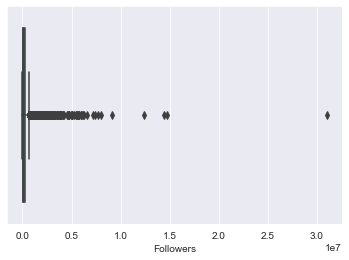

In [19]:
sns.boxplot(data_influencers['Followers']);

En este caso observamos que se comprueba nuestra hipotesis de que existen pocos perfiles muy por sobre la media, por lo cual vamos a filtarlos para analizar a la mayoria de nuestros creadores de contenido. Sabiendo que los datos outilers son datos que estan correctamente cargados para este caso

In [20]:
filtro = data_influencers.Followers < 2000000

/Users/agustinajaz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


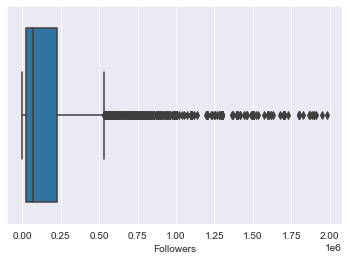

In [21]:
sns.boxplot(data_influencers[filtro]['Followers']);

<AxesSubplot:xlabel='Followers', ylabel='Count'>

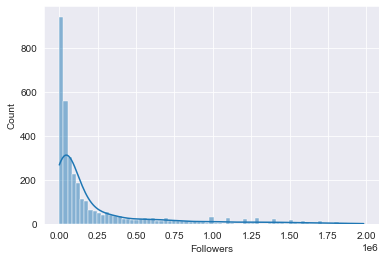

In [22]:
sns.histplot(data = data_influencers[filtro], x = 'Followers', kde=True)

Ahora si podemos analizar a la mayoria de nuestros creadores de contenido y esto nos permite poder armar una categorizacion de perfiles segun su cantidad de followers

In [23]:
def tamaño_creador(x):
    if x >=800000:
        return 'Grande'
    elif 300000 <= x < 800000:
        return 'Medio'
    else:
        return 'Pequeño'

data_influencers["tamaño_creador"] = data_influencers["Followers"].apply(tamaño_creador)

Para comprobar que la columna de tamaño_creador fue correctamente agregada seleccionaremos los primeros 5 creadores de contenido

In [24]:
data_influencers.head()

,Account,Link,Tenemos datos?,Fecha ultima actualización data,similar a,Followers,1ra Categoría,2da Categoría,3ra Categoría,ER,...,F 13-17,F 18-24,F 25-34,F 35-44,F 45-54,F 55-64,"F ""+65""",Argentina,Other,tamaño_creador
0,alfonsobenja,https://www.instagram.com/alfonsobenja,Si,2021-03-27,NaN,389358.0,Actor/Actress,NaN,NaN,0.0532,...,0.04,0.340,0.460,0.130,0.03,0.001,-0.001,0.880,0.120,Medio
1,lucianocaceresok,https://www.instagram.com/lucianocaceresok,No,2021-06-17,ludovicods,153011.0,Actor/Actress,NaN,NaN,0.0100,...,0.04,0.340,0.460,0.130,0.03,0.001,-0.001,0.930,0.070,Pequeño
2,ludovicods,https://www.instagram.com/ludovicods,Parcial,2018-10-23,alfonsobenja,342601.0,Actor/Actress,model,NaN,0.0560,...,0.04,0.340,0.460,0.130,0.03,0.001,-0.001,0.930,0.070,Medio
3,ailinzeta,https://www.instagram.com/ailinzeta,No,2019-02-28,florjazminpe,20200.0,Actor/Actress,NaN,NaN,0.0950,...,0.03,0.309,0.453,0.148,0.05,0.010,0.000,0.816,0.184,Pequeño
4,basnicar,https://www.instagram.com/basnicar,No,2019-09-19,stefroitman,858457.0,Actor/Actress,Model,NaN,0.0490,...,0.09,0.460,0.310,0.090,0.03,0.010,0.010,0.650,0.350,Grande


Para visualizar la cantidad de creadores de contenido de forma mas grafica utilizaremos un barchart

In [25]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,6
paleta = ["#66bd63", "#fee08b","#a50026"]

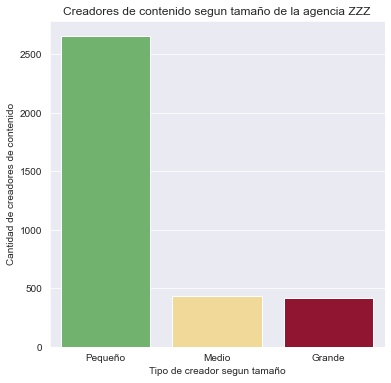

In [26]:
data_influencers['tamaño_creador'].value_counts()
sns.countplot(x='tamaño_creador', data=data_influencers, palette=paleta, order = data_influencers['tamaño_creador'].value_counts().index)
plt.xlabel("Tipo de creador segun tamaño")
plt.ylabel("Cantidad de creadores de contenido")
plt.title("Creadores de contenido segun tamaño de la agencia ZZZ")
plt.show()

Esta variable de followers podemos relacionarla con el ER de cada perfil y ver como es el comportamiento, por lo cual para poder ver la relacion entre followers y ER vamos a filtrar al perfil mas grande para que no nos ensucie el grafico.

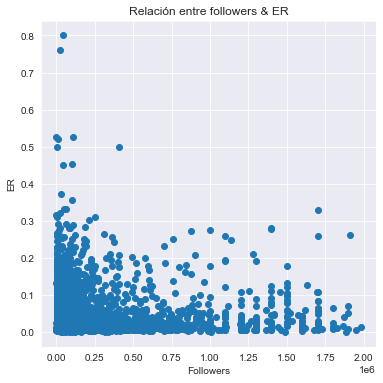

In [27]:
plt.scatter(data_influencers[filtro]['Followers'],data_influencers[filtro]['ER'])
plt.xlabel("Followers")
plt.ylabel("ER")
plt.title("Relación entre followers & ER")
plt.show()

En este caso no se observa una relacion muy estrecha entre followers y ER, solo podemos analizar que tenemos muchos perfiles entre los 0.00 y 0.5 followers y la mayoria de los perfiles cuentan con un ER de 0.0 a 0.2

## Variable categoria

Las categorias en nuestro DF estan algunas con mayuscula otras no, por lo cual vamos a pasar todas a minuscula

In [28]:
data_influencers['1ra Categoría'] = data_influencers['1ra Categoría'].str.lower()

In [29]:
print(f" Las categorias disponibles en la Agencia ZZZ son: {data_influencers['1ra Categoría'].unique()}")

 Las categorias disponibles en la Agencia ZZZ son: ['actor/actress' 'adventure' 'artist' 'bailarina' 'beauty' 'bebidas'
 'blogger' 'celebrities' 'centennials' 'chef' 'deco' 'deporte' 'doctor'
 'empresario' 'fashion' 'fitness' 'foodie' 'fotografo' 'gamer'
 'gourmandsconhambre.ba' 'healthy' 'humor' 'influencer' 'instagrammer'
 'jardin & botanica' 'journalist' 'lifestyle' 'model' 'moms' 'music'
 'native digital' 'salud' 'tecnología' 'tele' 'travel' 'vehículos' 'yoga'
 'youtube']


Aca vamos a ver la cantidad de creadores de contenido por categoria

In [30]:
creadores_por_categoria = data_influencers[['1ra Categoría', 'Account']].groupby('1ra Categoría').count()
creadores_por_categoria

,Account
1ra Categoría,
actor/actress,213
adventure,25
artist,96
bailarina,60
beauty,181
bebidas,28
blogger,29
celebrities,94
centennials,14


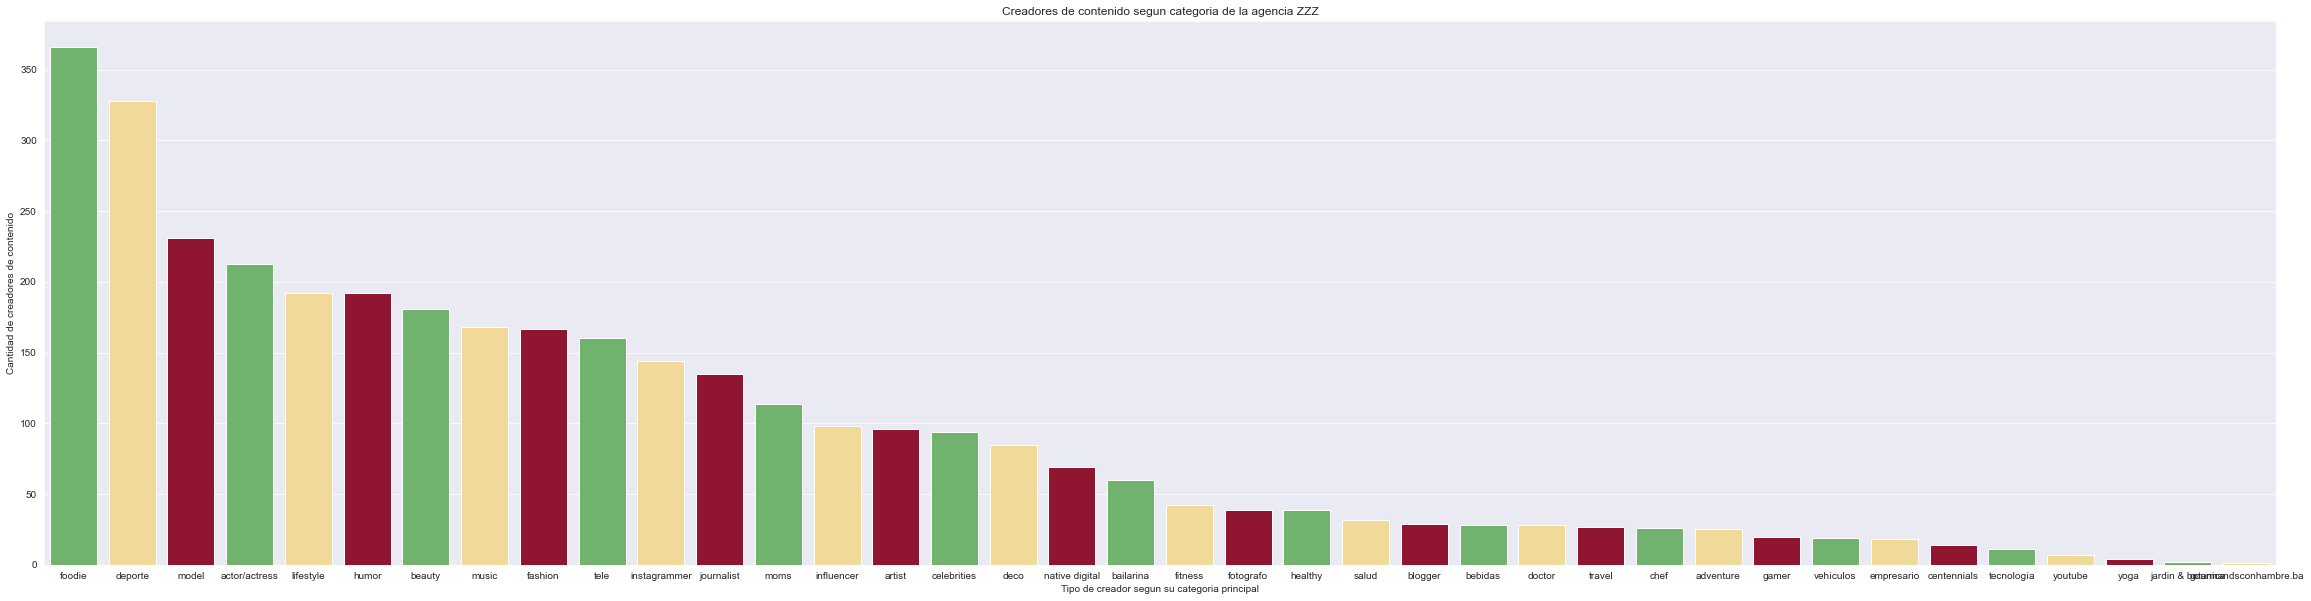

In [31]:
data_influencers['1ra Categoría'].value_counts()
plt.figure(figsize=(40,10))
sns.countplot(x='1ra Categoría', data=data_influencers, palette=paleta, order = data_influencers['1ra Categoría'].value_counts().index)
plt.xlabel("Tipo de creador segun su categoria principal")
plt.ylabel("Cantidad de creadores de contenido")
plt.title("Creadores de contenido segun categoria de la agencia ZZZ")
plt.show()

En caso de que quisieramos utilizar esta variable para un modelo, podriamos utilizar un One Hot Encoder.

## Variable "Tenemos datos?"

In [32]:
data_influencers['Tenemos datos?'] = data_influencers['Tenemos datos?'].str.lower()

In [33]:
print(f" Las posibles alternativas para tener datos son: {data_influencers['Tenemos datos?'].unique()}")

 Las posibles alternativas para tener datos son: ['si' 'no' 'parcial']


In [34]:
tenemos_datos = data_influencers[['Tenemos datos?', 'Account']].groupby('Tenemos datos?').count()
tenemos_datos

,Account
Tenemos datos?,
no,2390
parcial,236
si,878


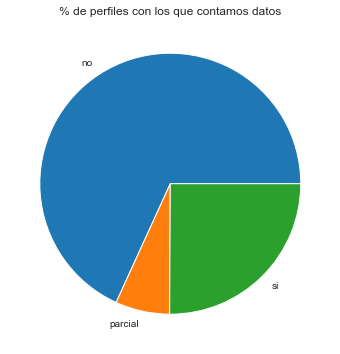

In [35]:
tipo_de_dato = ['no', 'parcial','si']
cantidad = [2390,236,879]
plt.pie(cantidad, labels=tipo_de_dato)
plt.title("% de perfiles con los que contamos datos" )
plt.show()

#Con esta informacion desde la agencia ZZZ podemos ver que el departamento de Talent (quien se encarga del contacto con los talentos) no esta consiguiendo las metricas reales de la mayoria de los perfiles y deberiamos tomar accion en este aspecto

## Base de datos: Resultados por Contenido

En este DF vamos a ver por cada linea un contenido con sus KPIs reales logradas.

In [36]:
path_file2 = "data/Base de datos Argentina  (1).xlsx"
data_resultados = pd.read_excel(path_file2)

In [37]:
data_resultados.head()

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Imp/alc,ER,Reach/foll,Plataforma,Marca,Acción,Fecha
0,_agusbelmonte,32800,Post Foto,9167,11001.0,621.0,1.2,NaN,0.280000,Instagram,Ala,Sou,Feb - Mar 2022
1,_agusbelmonte,33000,Post Foto,7006,8407.0,296.0,1.2,0.035,0.210000,Instagram,Eucerin,Curitas,2022-06-01 00:00:00
2,_agusbelmonte,32400,Story Foto,3159,3244.0,50.0,1.03,NaN,0.097500,Instagram,ALA,SOU,2021-07-01 00:00:00
3,_agusbelmonte,32400,Story Foto,3230,3313.0,50.0,1.03,NaN,0.099691,Instagram,ALA,SOU,2021-07-01 00:00:00
4,_agusbelmonte,32400,Story Foto,3397,3511.0,50.0,1.03,NaN,0.104846,Instagram,ALA,SOU,2021-07-01 00:00:00


In [38]:
data_resultados.columns

Index([' Account', 'Followers', 'Servicio', 'Alcance', 'Impresiones',
       'Interacciones', 'Imp/alc', 'ER', 'Reach/foll', 'Plataforma', 'Marca',
       'Acción', 'Fecha'],
      dtype='object')

Las columnas de este Data Frame significan lo siguiente:
- Account: Nombre del creador de perfil
- Followers: Tamaño de su audiencia
- Servicio: Esta variable es categoria y puede ser
   - Post Foto
   - Story Foto
- Alcance: cantidad de personas unicas alcanzadas con ese contenido
- Impresiones: cantidad de impresiones que obtuvo ese contenido
- Interacciones: es la sumatoria de todas las interacciones (Likes, comentarios, compartidos y guardados)
- Imp/Alc: es la relacion entre impresiones y alcance
- ER: es el engagment rate del contenido
- Reach/Foll: nos da el % de la audiencia alcanzada con el contenido
- Plataforma: en que red social fue compartido ese contenido
- Marca: nos detalla a que marca le corrresponde ese contenido
- Accion: Especifica que campaña fue
- Fecha: Nos detalla en que periodo se dio ese contenido

In [39]:
print(f" El dataframe es un excel con data de los influencers argentinos por plataforma. En el dataset hay {data_resultados.shape[0]} filas y {data_resultados.shape[1]} columnas. Los tipos de datos por columnas son {data_resultados.dtypes}")

 El dataframe es un excel con data de los influencers argentinos por plataforma. En el dataset hay 13129 filas y 13 columnas. Los tipos de datos por columnas son  Account          object
Followers          int64
Servicio          object
Alcance            int64
Impresiones      float64
Interacciones    float64
Imp/alc           object
ER                object
Reach/foll       float64
Plataforma        object
Marca             object
Acción            object
Fecha             object
dtype: object


En este caso vamos a analizar la cantidad de duplicados, es probable que existan. Porque conociendo la base de datos, cuando los creadores de contenido no envian toda la informacion de sus metricas, se duplican los resultados de un contenido similar del que tenemos datos disponibles. Por lo cual, no corresponderia eliminarlos

In [40]:
cantidad_duplicados1 = len(data_resultados) - len(data_resultados.drop_duplicates())
cantidad_duplicados1

509

Para analizar los NaN por columnas.

In [41]:
data_resultados.isna().sum()

 Account             0
Followers            0
Servicio             0
Alcance              0
Impresiones          1
Interacciones      372
Imp/alc             32
ER               10962
Reach/foll           0
Plataforma           0
Marca                0
Acción             169
Fecha                0
dtype: int64

Las columnas de reach/foll, Imp/alc y ER podemos eliminarlas y calcularlas desde python para asegurarnos que no existan errores. Por lo cual vamos a eliminarlas y volver a agregarlas

In [42]:
data_resultados = data_resultados.drop(['Reach/foll','Imp/alc','ER'], axis=1)
data_resultados

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha
0,_agusbelmonte,32800,Post Foto,9167,11001.0,621.000,Instagram,Ala,Sou,Feb - Mar 2022
1,_agusbelmonte,33000,Post Foto,7006,8407.0,296.000,Instagram,Eucerin,Curitas,2022-06-01 00:00:00
2,_agusbelmonte,32400,Story Foto,3159,3244.0,50.000,Instagram,ALA,SOU,2021-07-01 00:00:00
3,_agusbelmonte,32400,Story Foto,3230,3313.0,50.000,Instagram,ALA,SOU,2021-07-01 00:00:00
4,_agusbelmonte,32400,Story Foto,3397,3511.0,50.000,Instagram,ALA,SOU,2021-07-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
13124,merydelcerrok,2600000,Story Foto,158664,19798.0,4.033,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00
13125,merydelcerrok,2600000,Story Foto,166656,198156.0,1.294,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00
13126,merydelcerrok,2600000,Story Foto,105563,127547.0,3.921,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00
13127,merydelcerrok,2600000,Story Foto,154646,194407.0,4.850,Instagram,Tresemmé,Amplificación,2020-01-12 00:00:00


In [43]:
data_resultados["reach/foll"] = data_resultados['Alcance']/data_resultados['Followers']

In [44]:
data_resultados['Imp/Alc'] = data_resultados['Impresiones'] / data_resultados['Alcance']

In [45]:
data_resultados['ER'] = data_resultados['Interacciones'] / data_resultados['Impresiones']

Para analizar si las columnsa se agregaron y si los datos de ER son los correctos

In [46]:
data_resultados.nlargest(3, 'ER')

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha,reach/foll,Imp/Alc,ER
248,cocinaglutenfree.ok,16300,Story Foto,1042,1411.0,2744.0,Instagram,???,Cross Food - covid (mar - abr),2020-01-03 00:00:00,0.063926,1.354127,1.944720
5515,mariel_percossi,74600,Post Foto,4487,5026.0,6542.0,Instagram,Dove,D Red Wave 1,2020-01-12 00:00:00,0.060147,1.120125,1.301632
249,cocinaglutenfree.ok,16300,Story Foto,911,1166.0,1217.0,Instagram,???,Cross Food - covid (mar - abr),2020-01-03 00:00:00,0.055890,1.279912,1.043739


En este caso contar con ER mayores a 1 es un caso extraño. Por lo cual vamos a analizar las columnas

In [47]:
data_resultados.describe()

,Followers,Alcance,Impresiones,Interacciones,reach/foll,Imp/Alc,ER
count,1.312900e+04,1.312900e+04,1.312800e+04,1.275700e+04,1.312900e+04,1.312800e+04,12756.000000
mean,4.201421e+05,2.626051e+10,6.621820e+04,2.135143e+03,2.254945e+05,1.574913e+00,0.017549
std,6.851198e+05,2.185055e+12,2.854645e+05,2.277314e+04,1.829109e+07,1.128001e+01,0.045844
min,1.837000e+03,9.600000e+01,1.190000e+02,0.000000e+00,3.692308e-05,1.150000e-10,0.000000
25%,5.500000e+04,4.233000e+03,4.674250e+03,1.100000e+01,4.783784e-02,1.020000e+00,0.001071
50%,1.310000e+05,1.116000e+04,1.224800e+04,4.500000e+01,8.764228e-02,1.080992e+00,0.003403
75%,4.350000e+05,3.792600e+04,4.288750e+04,2.210000e+02,1.619576e-01,1.154039e+00,0.014501
max,5.800000e+06,2.127217e+14,1.210862e+07,1.632528e+06,1.552713e+09,1.080552e+03,1.944720


Aca podemos notar que el 75% llega a 0.01 de ER y el maximo esta en 1.94 por lo cual podemos creer que hay registros mal cargados. Para eso utilizaremos un boxplot

/Users/agustinajaz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


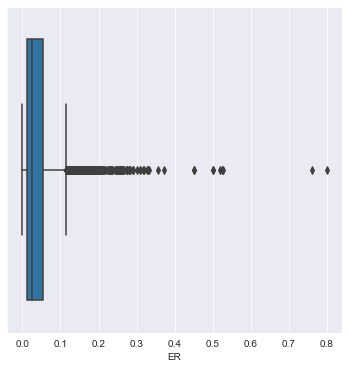

In [48]:
sns.boxplot(data_influencers['ER']);

Con este grafico podemos visualizar que existen datos "normales" hasta un ER de 0,04. Conociendo a la industria tiene logica, por lo cual vamos a filtar los datos que tengan un ER mayor a 0,4

In [49]:
filtro_ER = data_resultados['ER'] <= 0.4
data_resultados = data_resultados[filtro_ER]

/Users/agustinajaz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


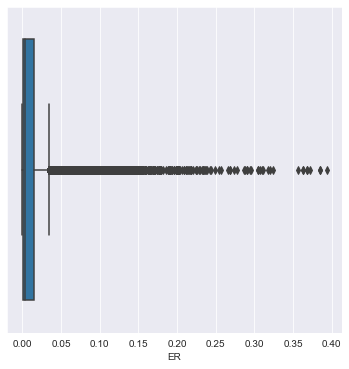

In [50]:
sns.boxplot(data_resultados['ER']);

Ahora vamos a analizar la variable Alcance

In [51]:
data_resultados.nlargest(3, 'Alcance')

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha,reach/foll,Imp/Alc,ER
9600,laufgallego YT,137000,Post Foto,212721739130435,24463.0,2162.0,Youtube,STP,NaN,2021-05-25 00:00:00,1.552713e+09,1.150000e-10,0.088378
10716,me.johansen,93800,Post Foto,132051785714286,147898.0,11890.0,Instagram,STP,NaN,2021-05-31 00:00:00,1.407802e+09,1.120000e-09,0.080393
9990,ailutokman TK,1600000,Post Foto,8956521,10300000.0,1632528.0,TikTok,Hellmann's,Ketchup,2022-06-01 00:00:00,5.597826e+00,1.150000e+00,0.158498


En este caso podemos notar que la relacion alcance no tiene sentido. Porque dice que alcanzo mas personas con una cantida muy pequeña de impresiones. Por lo cual estos dos datos son erroreos y debemos elimarlos.

In [52]:
filtro_alcance = data_resultados['Alcance'] <= 8956521
data_resultados = data_resultados[filtro_alcance]

In [53]:
data_resultados.nlargest(3, 'Alcance')

,Account,Followers,Servicio,Alcance,Impresiones,Interacciones,Plataforma,Marca,Acción,Fecha,reach/foll,Imp/Alc,ER
9990,ailutokman TK,1600000,Post Foto,8956521,10300000.0,1632528.0,TikTok,Hellmann's,Ketchup,2022-06-01 00:00:00,5.597826,1.15,0.158498
9454,kulinaria.recetas TK,3300000,Post Foto,5739130,6600000.0,1001527.0,TikTok,Cif,Climbing,2022-05-01 00:00:00,1.739130,1.15,0.151747
9450,kulinaria.recetas TK,2000000,Post Foto,5500000,6600000.0,879815.0,Tiktok,Cif,Climbing,Feb-Mar 2022,2.750000,1.20,0.133305


Lo sigueinte que haremos es analizar con que marcas trabaja la agencia ZZZ en Argentina

In [54]:
data_resultados['Marca'].str.lower().unique()

array(['ala', 'eucerin', 'sedal', 'vivere', 'skip', 'amex', 'dove',
       'klorane', '???', 'clight', 'dkny', 'rexona', 'ath', 'cif',
       'baby dove', 'pierre fabre', 'puig', 'maizena', 'energizer',
       'cabify', 'tommy', 'amex\xa0', 'milkaut', 'coderhouse', 'ufs',
       'bagó', 'aperol', 'dermaglós', 'nivea', 'savora', 'ank',
       'cencosud', 'naranja x', 'tang', 'unilever', 'adler', 'knorr',
       'gps farma', 'gum', 'skip ', 'armorall', 'disco', "hellmann's",
       'jumbo argentina', 'drogueria del sud', 'twdc', 'bagovit', 'stp',
       'rexona ', 'estee lauder', 'savencia', 'tresemmé', 'mercado libre'],
      dtype=object)

En este caso queremos saber cuanto contenido es en Posteo y cuanto en Story

In [55]:
tipo_contenido = data_resultados[['Servicio', ' Account']].groupby('Servicio').count()
tipo_contenido

,Account
Servicio,
Post Foto,1961
Story Foto,10777


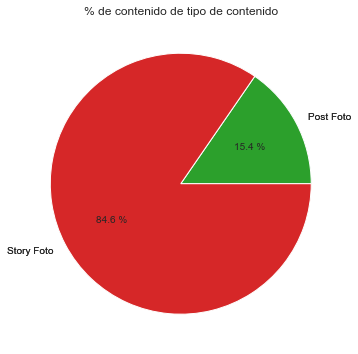

In [56]:
tipo_de_servio = ['Post Foto', 'Story Foto']
cantidad_por_servicio = [1961, 10777]
plt.pie(cantidad_por_servicio, labels=tipo_de_servio)
plt.title("% de contenido de tipo de contenido")
plt.pie(cantidad_por_servicio, labels=tipo_de_servio, autopct="%0.1f %%")
plt.show()

Y aca por plataforma:

In [57]:
contenido_plataforma = data_resultados[['Plataforma', ' Account']].groupby('Plataforma').count()
contenido_plataforma

,Account
Plataforma,
Facebook,3
Instagram,12657
TikTok,60
Tiktok,14
YouTube,3
Youtube,1


Pero como hay plataformas con distinta nomenclatura vamos a pasar todas a minuscula

In [58]:
data_resultados['Plataforma'] = data_resultados['Plataforma'].str.lower()

In [59]:
contenido_plataforma = data_resultados[['Plataforma', ' Account']].groupby('Plataforma').count()
contenido_plataforma

,Account
Plataforma,
facebook,3
instagram,12657
tiktok,74
youtube,4


## Modelo Regresion Multivariado
La hipotesis para este trabajo es que el alcance que consigue un contenido esta relacionado con la cantidad de followers que tiene el creador de contenido. Pero para eso vamos a analizar las diversas correlaciones entre las variables. Pero para podeer realizar este trabajo algunas columnas debemos estandarizar a traves de encoding

Hipótesis Nula (H0) = Existe una correlacion entre el alcance que obtiene un contenido esta relacionado con el tipo de contenido, la cantidad de followers, la plataforma y la cantidad de interacciones
Hipótesis Alternativa (H1) = No existe una relación entre el alcance del contenido y la cantidad de followers, cantidad de interacciones, plataforma y el tipo de contenido

In [60]:
data_resultados_2 = data_resultados.copy()

In [61]:
data_resultados_2.columns

Index([' Account', 'Followers', 'Servicio', 'Alcance', 'Impresiones',
       'Interacciones', 'Plataforma', 'Marca', 'Acción', 'Fecha', 'reach/foll',
       'Imp/Alc', 'ER'],
      dtype='object')

In [62]:
numericas = data_resultados_2.select_dtypes(exclude=['object']).columns
numericas

Index(['Followers', 'Alcance', 'Impresiones', 'Interacciones', 'reach/foll',
       'Imp/Alc', 'ER'],
      dtype='object')

Se van a seleccionar algunas variables de interés sobre las cuáles trabajar:

In [63]:
variables_seleccionadas = ['Alcance', 'Servicio',
                      'Followers',
                     'Interacciones',
                     'Plataforma']
data_resultados_2 = data_resultados_2[variables_seleccionadas].copy()

In [64]:
data_resultados_2.isnull().sum()

Alcance          0
Servicio         0
Followers        0
Interacciones    0
Plataforma       0
dtype: int64

### Variables Numericas

Ahora pasaremos a analizar las variables numericas de nuestro modelo

Cuando tratamos con variables numericas de grandes magnitudes pueden superrar incorrectamente las caracteristicas de las pequeñas magnitudes. Por lo cual, escalando estas variables a magnitudes mas pequeñas coopera a mejorar la eficiencia computacional y ayuda a que los coeficientes que surgan de nuestro modelo, sean mas entendibles. Para realizar los escalados se deben analizar la presencia de outliers y la manera que se distribuyen nuestros datos.
Es lo proximo que haremos en este trabajo practico

In [65]:
numericas = data_resultados_2.select_dtypes(exclude=['object']).columns
numericas

Index(['Alcance', 'Followers', 'Interacciones'], dtype='object')

<AxesSubplot:title={'center':'Boxplot deInteracciones'}, xlabel='Interacciones'>

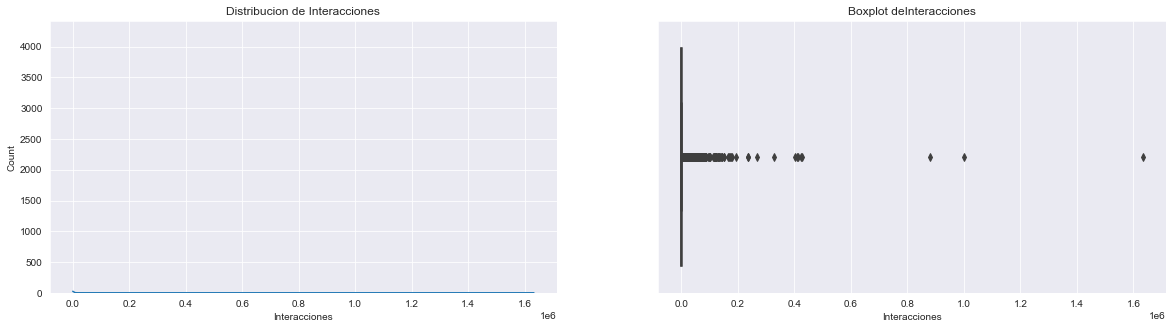

In [66]:
variable = 'Interacciones'

fig, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = data_resultados_2, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = data_resultados_2, x = f"{variable}", ax=ax[1])

In [67]:
data_resultados_2.nlargest(5, 'Interacciones')

,Alcance,Servicio,Followers,Interacciones,Plataforma
9990,8956521,Post Foto,1600000,1632528.0,tiktok
9454,5739130,Post Foto,3300000,1001527.0,tiktok
9450,5500000,Post Foto,2000000,879815.0,tiktok
384,1010957,Post Foto,1500000,425120.0,instagram
13092,3451548,Post Foto,3800000,422406.0,tiktok


Estos contenidos que estan muy sobre la media, son contenidos que seguramente se viralizaron en estas plataformas, por lo cual no seria correcto eliminarlos

<AxesSubplot:title={'center':'Boxplot deFollowers'}, xlabel='Followers'>

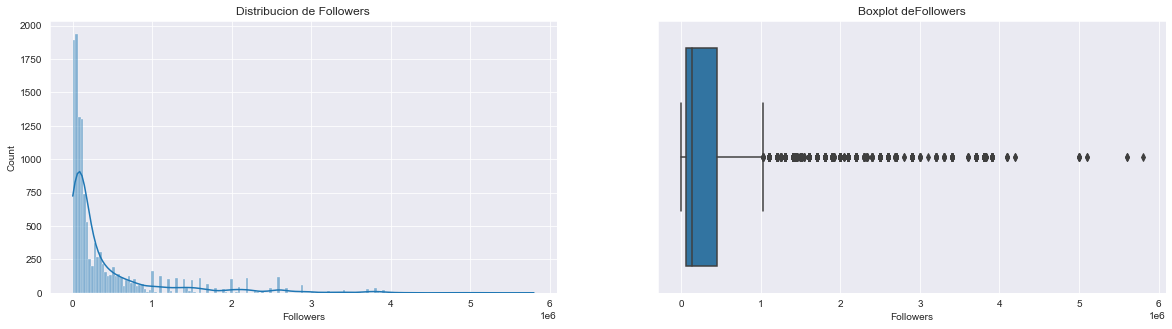

In [68]:
variable = 'Followers'

fig, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = data_resultados_2, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = data_resultados_2, x = f"{variable}", ax=ax[1])

In [69]:
data_resultados_2.nlargest(5, 'Followers')

,Alcance,Servicio,Followers,Interacciones,Plataforma
666,348023,Post Foto,5800000,80012.0,tiktok
8505,373103,Story Foto,5600000,32.0,instagram
8506,337034,Story Foto,5600000,28.0,instagram
8507,149521,Story Foto,5100000,9.0,instagram
8508,146488,Story Foto,5100000,24.0,instagram


En este caso, vemos que son perfiles muy grandes los que comunicaron y no es una cantidad de followers extraña

<AxesSubplot:title={'center':'Boxplot deAlcance'}, xlabel='Alcance'>

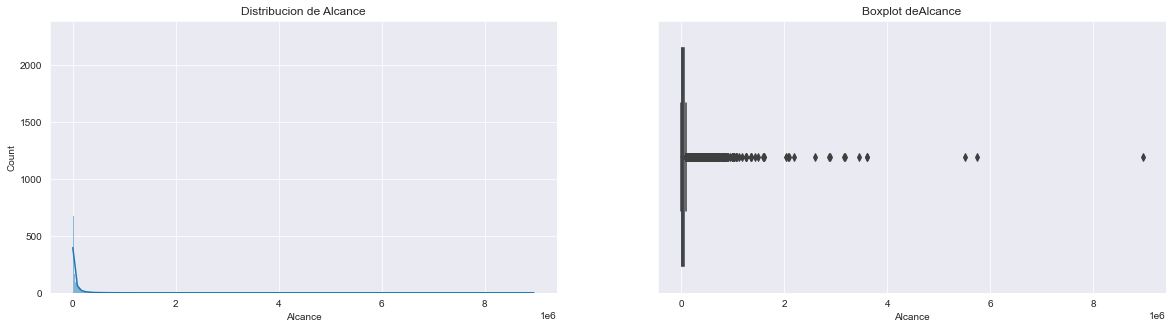

In [70]:
variable = 'Alcance'

fig, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = data_resultados_2, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = data_resultados_2, x = f"{variable}", ax=ax[1])

In [71]:
data_resultados_2.nlargest(5, 'Alcance')

,Alcance,Servicio,Followers,Interacciones,Plataforma
9990,8956521,Post Foto,1600000,1632528.0,tiktok
9454,5739130,Post Foto,3300000,1001527.0,tiktok
9450,5500000,Post Foto,2000000,879815.0,tiktok
459,3607585,Post Foto,2100000,142801.0,instagram
460,3607585,Post Foto,2100000,142801.0,instagram


En este caso vemos que justo los contenidos con mayor cantidad de alcance, son los contenidos que previamente tenian mayor cantidad de interacciones por lo cual es otra razon mas para no eliminarlos y considerar que son contenidos que se viralizaron

En estos casos podemos ver que contamos con datos outliers y la distribucion no se distingue muy bien. Por lo cual vamos a utilizar el escalado robusto para normalizar los datos.

In [72]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
data_resultados_2['Alcance'] = rb_scaler.fit_transform(data_resultados_2[['Alcance']])
data_resultados_2.head()

,Alcance,Servicio,Followers,Interacciones,Plataforma
0,-0.065565,Post Foto,32800,621.0,instagram
1,-0.126928,Post Foto,33000,296.0,instagram
2,-0.236166,Story Foto,32400,50.0,instagram
3,-0.234150,Story Foto,32400,50.0,instagram
4,-0.229408,Story Foto,32400,50.0,instagram


In [73]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
data_resultados_2['Followers'] = rb_scaler.fit_transform(data_resultados_2[['Followers']])
data_resultados_2.head()

,Alcance,Servicio,Followers,Interacciones,Plataforma
0,-0.065565,Post Foto,-0.256596,621.0,instagram
1,-0.126928,Post Foto,-0.256079,296.0,instagram
2,-0.236166,Story Foto,-0.257631,50.0,instagram
3,-0.234150,Story Foto,-0.257631,50.0,instagram
4,-0.229408,Story Foto,-0.257631,50.0,instagram


In [74]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
data_resultados_2['Interacciones'] = rb_scaler.fit_transform(data_resultados_2[['Interacciones']])
data_resultados_2.head()

,Alcance,Servicio,Followers,Interacciones,Plataforma
0,-0.065565,Post Foto,-0.256596,2.769231,instagram
1,-0.126928,Post Foto,-0.256079,1.206731,instagram
2,-0.236166,Story Foto,-0.257631,0.024038,instagram
3,-0.234150,Story Foto,-0.257631,0.024038,instagram
4,-0.229408,Story Foto,-0.257631,0.024038,instagram


In [75]:
data_resultados_2.head()

,Alcance,Servicio,Followers,Interacciones,Plataforma
0,-0.065565,Post Foto,-0.256596,2.769231,instagram
1,-0.126928,Post Foto,-0.256079,1.206731,instagram
2,-0.236166,Story Foto,-0.257631,0.024038,instagram
3,-0.234150,Story Foto,-0.257631,0.024038,instagram
4,-0.229408,Story Foto,-0.257631,0.024038,instagram


### Variables categoricas

En primer lugar, contamos con una variable categoria que debemos convertirla a numerica. Esto lo realizaremos con encoding. En este caso como son dos variables unicamente es mas sencillo de realizar a traves de codigo

In [76]:
print(f"Los valores unicos de Aspiration son {data_resultados_2.Servicio.unique()}")

Los valores unicos de Aspiration son ['Post Foto' 'Story Foto']


In [77]:
def contenido(x):
    if x =="Story Foto":
        return 1
    elif x == "Post Foto":
        return 0
    else:
        return 'error'

data_resultados_2["tipo_contenido"] = data_resultados_2["Servicio"].apply(contenido)
data_resultados_2.drop(columns='Servicio', inplace = True)

In [78]:
data_resultados_2.head()

,Alcance,Followers,Interacciones,Plataforma,tipo_contenido
0,-0.065565,-0.256596,2.769231,instagram,0
1,-0.126928,-0.256079,1.206731,instagram,0
2,-0.236166,-0.257631,0.024038,instagram,1
3,-0.234150,-0.257631,0.024038,instagram,1
4,-0.229408,-0.257631,0.024038,instagram,1


In [79]:
print(f"Los valores unicos de Aspiration son {data_resultados_2.Plataforma.unique()}")

Los valores unicos de Aspiration son ['instagram' 'tiktok' 'facebook' 'youtube']


Para el caso de esta variable utilizaremos un OneHotEncoder porque nos facilitara el cambio de variable categorica a numero

In [80]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(data_resultados_2[['Plataforma']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
plataforma_encoded = ohe.transform(data_resultados_2[['Plataforma']])

data_resultados_2[ohe.get_feature_names_out()] = plataforma_encoded


data_resultados_2.drop(columns='Plataforma', inplace = True)

data_resultados_2

[array(['facebook', 'instagram', 'tiktok', 'youtube'], dtype=object)]

array(['Plataforma_facebook', 'Plataforma_instagram', 'Plataforma_tiktok',
       'Plataforma_youtube'], dtype=object)

,Alcance,Followers,Interacciones,tipo_contenido,Plataforma_facebook,Plataforma_instagram,Plataforma_tiktok,Plataforma_youtube
0,-0.065565,-0.256596,2.769231,0,0.0,1.0,0.0,0.0
1,-0.126928,-0.256079,1.206731,0,0.0,1.0,0.0,0.0
2,-0.236166,-0.257631,0.024038,1,0.0,1.0,0.0,0.0
3,-0.234150,-0.257631,0.024038,1,0.0,1.0,0.0,0.0
4,-0.229408,-0.257631,0.024038,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
13124,4.179488,6.383859,-0.196957,1,0.0,1.0,0.0,0.0
13125,4.406426,6.383859,-0.210125,1,0.0,1.0,0.0,0.0
13126,2.671655,6.383859,-0.197495,1,0.0,1.0,0.0,0.0
13127,4.065395,6.383859,-0.193029,1,0.0,1.0,0.0,0.0


## Modelo Regresion Lineal

Como dijimos anteriormente creemos que el alcance se explica por la cantidad de followers que tiene un perfil, la cantidad de interacciones que consigue ese contenido, el tipo de plataforma y el tipo de contenido que se publica.
Por lo cual vamos a analizar la relacion entre estas variables

Por lo cual en este grafico vamos a visualizar la relacion de todos nuestros datos entre el alcance y las interacciones

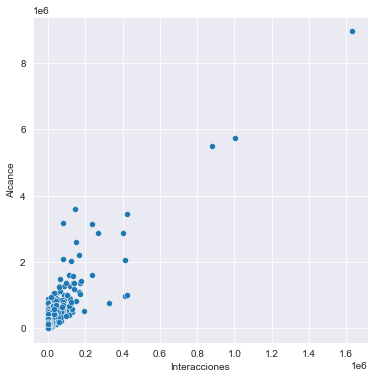

In [81]:
sns.scatterplot(x='Interacciones', y='Alcance', data=data_resultados);

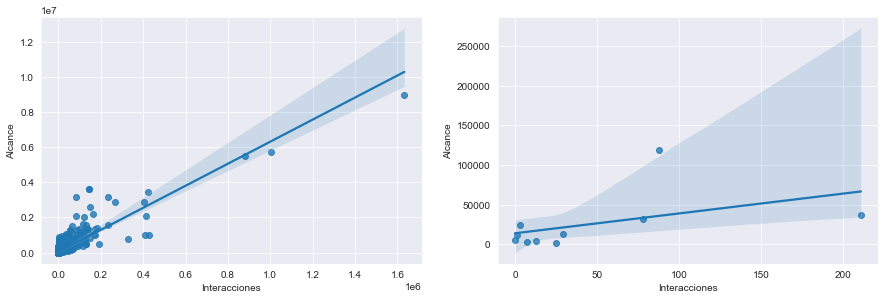

In [82]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='Interacciones', y='Alcance', data=data_resultados, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='Interacciones', y='Alcance', data=data_resultados.sample(10, random_state=3), ci=95);

In [83]:
import seaborn as sns

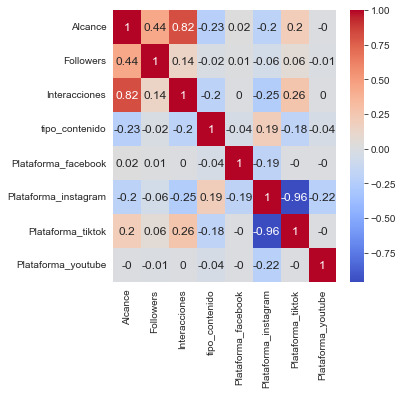

In [84]:
plt.figure(figsize = (5, 5))
sns.heatmap(round(data_resultados_2.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});

Otra manera de ver lo mismo es:

In [85]:
round(data_resultados_2.corr(),2)

,Alcance,Followers,Interacciones,tipo_contenido,Plataforma_facebook,Plataforma_instagram,Plataforma_tiktok,Plataforma_youtube
Alcance,1.00,0.44,0.82,-0.23,0.02,-0.20,0.20,-0.00
Followers,0.44,1.00,0.14,-0.02,0.01,-0.06,0.06,-0.01
Interacciones,0.82,0.14,1.00,-0.20,0.00,-0.25,0.26,0.00
tipo_contenido,-0.23,-0.02,-0.20,1.00,-0.04,0.19,-0.18,-0.04
Plataforma_facebook,0.02,0.01,0.00,-0.04,1.00,-0.19,-0.00,-0.00
Plataforma_instagram,-0.20,-0.06,-0.25,0.19,-0.19,1.00,-0.96,-0.22
Plataforma_tiktok,0.20,0.06,0.26,-0.18,-0.00,-0.96,1.00,-0.00
Plataforma_youtube,-0.00,-0.01,0.00,-0.04,-0.00,-0.22,-0.00,1.00


Es sorprendente notar que la hipotesis a primer vista se cumple, hay algunas variables que tienen una correlacion mas fuerte que otras. Pero en el caso de Alcance con Interacciones es la correlacion mas fuerte que vemos entre nuestras variables.

Para la agencia ZZZ este insight es muy interesante, porque al momento de contratar a un influencers con el que no se trabajo se podria predecir cuanto es el alcance. Esto se debe a que las metricas de alcance e impresiones son privadas en la mayoria de las plataformas, pero la mayoria de las interacciones si son publicas. Entonces para esta agencia, sabiendo las interacciones del perfil podria estimar cuanto es el alcance y determinar si le sirve o no para las diversas campañas de marketing

In [86]:
features = ["Followers", "Interacciones", "tipo_contenido", "Plataforma_facebook", "Plataforma_instagram", "Plataforma_tiktok", "Plataforma_youtube"]

In [87]:
formula = "Alcance ~ " + ' + '.join(features)
formula

'Alcance ~ Followers + Interacciones + tipo_contenido + Plataforma_facebook + Plataforma_instagram + Plataforma_tiktok + Plataforma_youtube'

In [88]:
import statsmodels.formula.api as smf
modelo = smf.ols(formula = formula, data = data_resultados_2).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                Alcance   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     7896.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:43:02   Log-Likelihood:                -28535.
No. Observations:               12738   AIC:                         5.708e+04
Df Residuals:                   12731   BIC:                         5.714e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8379 

El R2 es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. Donde lo ideal es estar con un R2 de 1. Por lo cual, en nuestro modelo contar con un R2 de 0,788 es un resultado muy favorable para nuestro modelo.

Luego de estos resultados tenemos los coeficientes de las variables independientes de nuestro modelo. El signo sea positivo o negativo explican en que medida reducen o incrementan a la variable dependiente (Alcance)


In [89]:
print(modelo.params)

Intercept               0.837933
Followers               0.925945
Interacciones           0.034683
tipo_contenido         -0.951793
Plataforma_facebook     3.663323
Plataforma_instagram    0.093167
Plataforma_tiktok      -2.177689
Plataforma_youtube     -0.740868
dtype: float64


In [90]:
data_resultados_2

,Alcance,Followers,Interacciones,tipo_contenido,Plataforma_facebook,Plataforma_instagram,Plataforma_tiktok,Plataforma_youtube
0,-0.065565,-0.256596,2.769231,0,0.0,1.0,0.0,0.0
1,-0.126928,-0.256079,1.206731,0,0.0,1.0,0.0,0.0
2,-0.236166,-0.257631,0.024038,1,0.0,1.0,0.0,0.0
3,-0.234150,-0.257631,0.024038,1,0.0,1.0,0.0,0.0
4,-0.229408,-0.257631,0.024038,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
13124,4.179488,6.383859,-0.196957,1,0.0,1.0,0.0,0.0
13125,4.406426,6.383859,-0.210125,1,0.0,1.0,0.0,0.0
13126,2.671655,6.383859,-0.197495,1,0.0,1.0,0.0,0.0
13127,4.065395,6.383859,-0.193029,1,0.0,1.0,0.0,0.0


In [91]:
data_resultados_standardized = data_resultados_2.copy()
for f in features:
    mu = data_resultados_2[f].mean()
    sigma = data_resultados_2[f].std()
    data_resultados_standardized[f] = data_resultados_2[f].map(lambda x: (x - mu) / sigma)
data_resultados_standardized

,Alcance,Followers,Interacciones,tipo_contenido,Plataforma_facebook,Plataforma_instagram,Plataforma_tiktok,Plataforma_youtube
0,-0.065565,-0.569788,-0.065923,-2.344192,-0.015348,0.079994,-0.076439,-0.017723
1,-0.126928,-0.569498,-0.080189,-2.344192,-0.015348,0.079994,-0.076439,-0.017723
2,-0.236166,-0.570369,-0.090987,0.426553,-0.015348,0.079994,-0.076439,-0.017723
3,-0.234150,-0.570369,-0.090987,0.426553,-0.015348,0.079994,-0.076439,-0.017723
4,-0.229408,-0.570369,-0.090987,0.426553,-0.015348,0.079994,-0.076439,-0.017723
...,...,...,...,...,...,...,...,...
13124,4.179488,3.159518,-0.093005,0.426553,-0.015348,0.079994,-0.076439,-0.017723
13125,4.406426,3.159518,-0.093125,0.426553,-0.015348,0.079994,-0.076439,-0.017723
13126,2.671655,3.159518,-0.093010,0.426553,-0.015348,0.079994,-0.076439,-0.017723
13127,4.065395,3.159518,-0.092969,0.426553,-0.015348,0.079994,-0.076439,-0.017723


In [92]:
model_standarized = smf.ols(formula = formula, data = data_resultados_2 ).fit()

<AxesSubplot:>

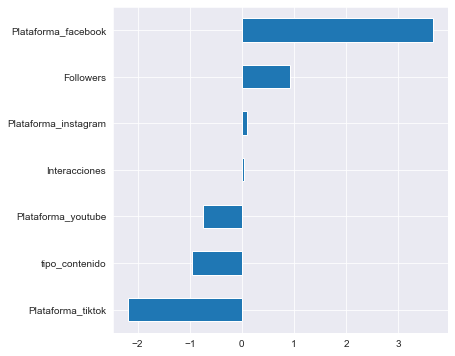

In [93]:
model_standarized.params[1:].sort_values().plot(kind='barh')

Con este codigo y grafico visualizamos como se comportan las variables en nuestro modelo y como explican la prediccion sea para afectar positiva o negativamente

In [94]:
predicted_alcance = model_standarized.predict(data_resultados_standardized[features])
residuos = predicted_alcance - data_resultados_2.Alcance

In [95]:
residuos

0        2.735624
1        2.796762
2        0.267642
3        0.265626
4        0.260884
           ...   
13124   -0.694413
13125   -0.921355
13126    0.813421
13127   -0.580318
13128    0.146434
Length: 12738, dtype: float64

In [96]:
RMSE = (residuos **2).mean()**0.5
RMSE

6.47567765791219

El RMSE es una medida de uso frecuente de las diferencias entre los valores (valores de muestra o de población) predichos por un modelo o un estimador y los valores observados.

Text(0.5, 1.0, 'residuals density plot')

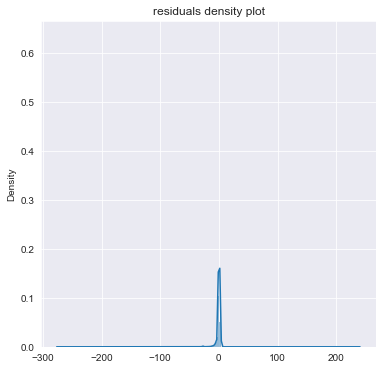

In [97]:
sns.histplot(residuos, kde=True, stat='density', discrete=True)
plt.title('residuals density plot')

Text(0.5, 1.0, 'distribution of predicted and actual values')

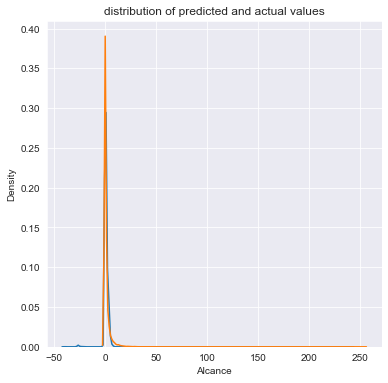

In [98]:
sns.kdeplot(predicted_alcance, label='predicted review score') #AZUL
sns.kdeplot(data_resultados_2.Alcance, label = 'actual review score') #NARANJA
plt.title('distribution of predicted and actual values')

Con estos dos graficos visualizamos como predice nuestro modelo contra el dato real

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
seed = 0
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.metrics import classification_report

In [100]:
X = data_resultados_2.drop(columns=['Alcance'])
y = data_resultados_2['Alcance']

In [101]:
X

,Followers,Interacciones,tipo_contenido,Plataforma_facebook,Plataforma_instagram,Plataforma_tiktok,Plataforma_youtube
0,-0.256596,2.769231,0,0.0,1.0,0.0,0.0
1,-0.256079,1.206731,0,0.0,1.0,0.0,0.0
2,-0.257631,0.024038,1,0.0,1.0,0.0,0.0
3,-0.257631,0.024038,1,0.0,1.0,0.0,0.0
4,-0.257631,0.024038,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
13124,6.383859,-0.196957,1,0.0,1.0,0.0,0.0
13125,6.383859,-0.210125,1,0.0,1.0,0.0,0.0
13126,6.383859,-0.197495,1,0.0,1.0,0.0,0.0
13127,6.383859,-0.193029,1,0.0,1.0,0.0,0.0


En este caso realizaremos el mismo modelo pero desde otra herramienta

In [102]:
model = LinearRegression()

Para realizar este modelo utilaremos algunos datos para testear y otros datos para estimar y comprobar como funciona nuestro modelo

In [103]:
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X, y,test_size = 0.2, shuffle=True, random_state=seed)

In [104]:
model.fit(X_gen_train, y_gen_train)

LinearRegression()

In [105]:
LR_y_gen_pred = model.predict(X_gen_test)
LR_compare_gen_df = pd.DataFrame({'Actual': y_gen_test,
                                  'Predicted output': LR_y_gen_pred})
LR_compare_gen_df.head()

,Actual,Predicted output
578,3.797227,4.663372
11865,-0.214387,-0.142885
8437,0.506123,-0.126100
1647,-0.170118,0.414453
11796,3.838770,6.181543


In [106]:
LR_gen_r2 = r2_score(y_gen_test, LR_y_gen_pred)
LR_gen_MAE = mean_absolute_error(y_gen_test, LR_y_gen_pred)
LR_gen_MAPE = round(metrics.mean_absolute_percentage_error(y_gen_test, LR_y_gen_pred),2)

print(f'Coefficients= {model.coef_}')
print(f'MAE = {LR_gen_MAE}')
print(f'MSE = {mean_squared_error(y_gen_test, LR_y_gen_pred)}')
print(f'RMSE = {mean_squared_error(y_gen_test, LR_y_gen_pred, squared=False)}')
print(f'r2 = {LR_gen_r2}')
print(f'Training score = {model.score(X_gen_train, y_gen_train)}')
print(f'Test score = {model.score(X_gen_test, y_gen_test)}')
print(f"MAPE = {LR_gen_MAPE}")

Coefficients= [ 0.91732969  0.0354063  -0.83638524  3.55251817 -0.11993657 -2.56988167
 -0.86269992]
MAE = 0.8008685417721888
MSE = 5.57342995427967
RMSE = 2.360811291543581
r2 = 0.8664690247435657
Training score = 0.7470650711313075
Test score = 0.8664690247435657
MAPE = 4.88


### Predecir un Alcance

Vamos a intentar estimar un contenido de un creador de perfil que tiene 100.000, interacciones totales de 10.234, un tipo_contenido que es una story y que fue publicado via Instagram

In [107]:
x = ([[100000,10234,1,0,1,0,0]])

In [108]:
model.predict(x)

/Users/agustinajaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92095.30377522])

El proximo caso vamos a intentar estimar un contenido de un creador de perfil que tiene 20.000, interacciones totales de 502, un tipo_contenido que es un post y que fue publicado via TikTok


In [109]:
y = ([[20000,502,0,0,0,1,0]])

In [110]:
model.predict(y)

/Users/agustinajaz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18362.74103328])

### Conclusion

Para finalizar el trabajo, podemos asegurar que podemos estimar el alcance a traves de las variables que declaramos importantes y nos permiten visualizar contenidos via redes sociales que ayudarian a las agencias de medios a estimar cuanto pueden conseguir los diversos creadores de contenidos sin necesidad de pedirles las metricas oficiales. La parte positiva del modelo, es que mientras mas contenidos la agencia genere y tenga en su base de datos, mas especifico se hara el modelo.